# Using decision trees to classify galaxies

In [58]:
import numpy as np
file=np.load("galaxy_catalogue.npy")
np.random.shuffle(file)

In [59]:
target=file["class"]
features=np.empty(shape=(len(file),13))
features[:,0]=file["u-g"]
features[:,1]=file["g-r"]
features[:,2]=file["r-i"]
features[:,3]=file["i-z"]
features[:,4]=file["ecc"]
features[:,5]=file["m4_u"]
features[:,6]=file["m4_g"]
features[:,7]=file["m4_r"]
features[:,8]=file["m4_i"]
features[:,9]=file['m4_z']
features[:,10]=file['petroR50_u']/file['petroR90_u'] 
features[:,11]=file['petroR50_r']/file['petroR90_r'] 
features[:,12]=file['petroR50_z']/file['petroR90_z'] 

In [60]:
train_x=features[:int(len(file)*0.7)]
test_x=features[int(len(file)*0.7):]
train_y=target[:int(len(file)*0.7)]
test_y=target[int(len(file)*0.7):]

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
prediction=dtc.predict(test_x)

In [62]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [63]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

In [71]:
def accuracy(a,b):
    dif=0
    for i in range(len(a)):
        if (a[i]==b[i]):
            dif+=1
    return(dif/len(a))

In [72]:
model_score=accuracy(prediction,test_y)

In [73]:
class_labels=list(set(test_y))
cm=confusion_matrix(y_true=test_y, y_pred=prediction, labels=class_labels)

Confusion matrix, without normalization
[[59 18  0]
 [13 58  7]
 [ 1  8 70]]


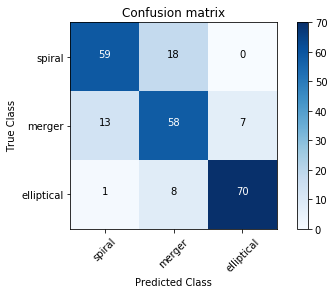

In [74]:
plt.figure()
plot_confusion_matrix(cm,class_labels,normalize=False)
plt.show()

In [75]:
class_labels

['spiral', 'merger', 'elliptical']

In [76]:
model_score

0.7991452991452992

# Using random forest to classify galaxies

In [77]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [85]:
rfc_model=rfc(n_estimators=100)

In [82]:
rfc_model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
from sklearn.model_selection import cross_val_predict

In [88]:
 predicted1 = cross_val_predict(rfc_model,train_x,train_y, cv=10)

In [89]:
accuracy(predicted1,train_y)

0.8663003663003663

In [93]:
model_cm = confusion_matrix(y_true=train_y, y_pred=predicted1 ,labels=class_labels)

Confusion matrix, without normalization
[[156  25   2]
 [ 26 144  12]
 [  0   8 173]]


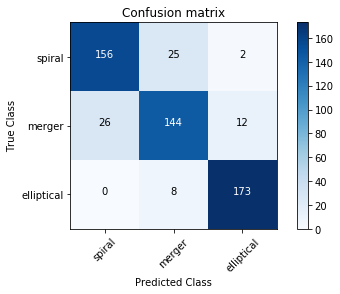

In [94]:
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()